# 70 Dog Breeds Neural Net

Data Exploration Stage:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Loading the train test and valid data sets

In [2]:
# # this section only for using Colab
# # this method should work, haven't tested

# from google.colab import drive

# # this is my directory path name, you can make a path exact as this path,
# # or modify the path below to fit your path
# # when you open Google Drive, the main page is on "My Drive" level
# foldername = "/content/gdrive/My Drive/DropBox/GroupProject/ML.Project.ecs171-main"

# drive.mount(foldername)

In [3]:
train =  pd.read_csv('dogs.csv')
test =  pd.read_csv('dogs.csv')
valid =  pd.read_csv('dogs.csv')
data_all = pd.read_csv('dogs.csv')

Modifying so they have the right train test and valid values.

In [4]:
train = train[train.dataset == 'train']
test = test[test.dataset == 'test']
valid = valid[valid.dataset == 'valid']


In [5]:
display(valid)

,filepaths,labels,dataset
8646,valid/Afghan/01.jpg,Afghan,valid
8647,valid/Afghan/02.jpg,Afghan,valid
8648,valid/Afghan/03.jpg,Afghan,valid
8649,valid/Afghan/04.jpg,Afghan,valid
8650,valid/Afghan/05.jpg,Afghan,valid
...,...,...,...
9341,valid/Yorkie/06.jpg,Yorkie,valid
9342,valid/Yorkie/07.jpg,Yorkie,valid
9343,valid/Yorkie/08.jpg,Yorkie,valid
9344,valid/Yorkie/09.jpg,Yorkie,valid


Showing an example image.
All images are in the resolution of 224x224 and do not require any resizing or cropping or normalization by us.<br> 
Number of Images: 93406<br> 
Number of Training Images: 7946<br> 
Number of Test Images: 700<br> 
Number of Valid Images: 700<br> 


'test/Afghan/01.jpg'

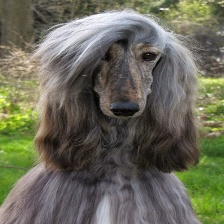

In [6]:
from IPython.display import Image
imgname = test.filepaths[7946]
display(imgname)
Image(filename= imgname) 

Showing all the unique types of breeds in the data set. Which we will use to form our classes<br>
We noticed here that there was a typo in the dog breed "American Spaniel" that divided it into two seperate classes. We fixed this by using the replace function and now it is all uniform.

In [7]:
data_all['labels'] = data_all['labels'].replace(['American  Spaniel'], 'American Spaniel')
breeds = data_all['labels'].unique()
display(breeds)


array(['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless',
       'American Spaniel', 'Basenji', 'Basset', 'Beagle',
       'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim',
       'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi',
       'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier',
       'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow',
       'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote',
       'Dalmation', 'Dhole', 'Dingo', 'Doberman', 'Elk Hound',
       'French Bulldog', 'German Sheperd', 'Golden Retriever',
       'Great Dane', 'Great Perenees', 'Greyhound', 'Groenendael',
       'Irish Spaniel', 'Irish Wolfhound', 'Japanese Spaniel', 'Komondor',
       'Labradoodle', 'Labrador', 'Lhasa', 'Malinois', 'Maltese',
       'Mex Hairless', 'Newfoundland', 'Pekinese', 'Pit Bull',
       'Pomeranian', 'Poodle', 'Pug', 'Rhodesian', 'Rottweiler',
       'Saint Bernard', 'Schnauzer', 'Scotch Terrier', 'Shar_Pei',
       'Shiba In

In [8]:

num_breeds = []
for name in breeds:
    num_breeds.append(len(data_all[data_all.labels == name])) 
  



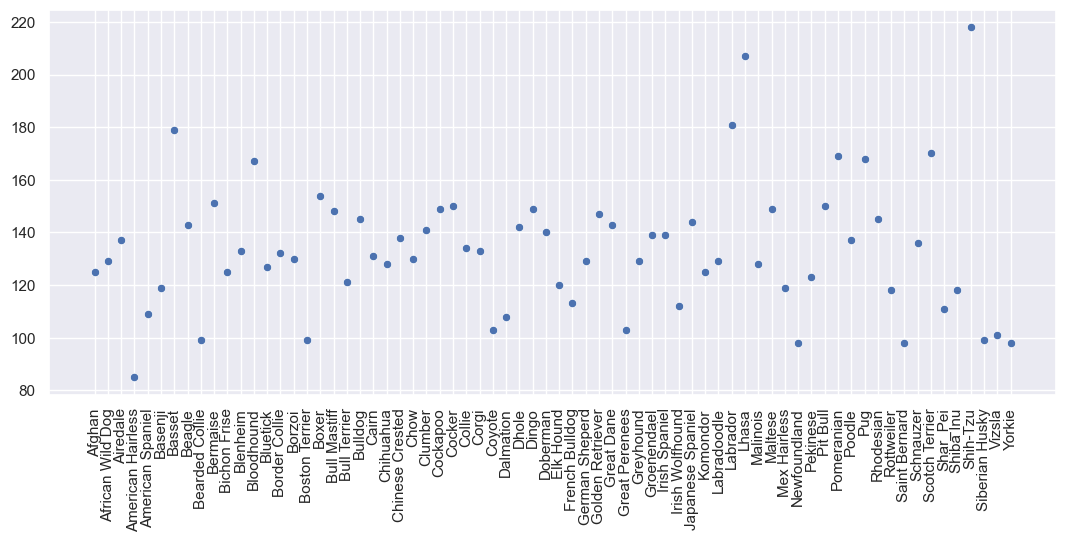

In [9]:
sns.set(rc={'figure.figsize':(13,5)})
ax = sns.scatterplot(x = breeds, y = num_breeds)
ax.tick_params(axis='x', rotation=90)


**NN**

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Rescaling
from keras.preprocessing.image import ImageDataGenerator

In [11]:
bSize = 50
lRate = 0.01
Epochs = 30

In [12]:
Classes = []
for i in breeds:
    Classes.append(i)

In [13]:
# reference for this ImageDataGenerator image labeling and feeding method:
# https://towardsdatascience.com/a-single-function-to-streamline-image-classification-with-keras-bd04f5cfe6df
# it is a built in function in Keras
train_Gen = ImageDataGenerator(rescale = 1. / 255)
train_genX = train_Gen.flow_from_directory(
    'train',
    target_size = (224, 224),
    batch_size = bSize,
    classes = Classes,
    class_mode = 'categorical'
)

Found 7946 images belonging to 70 classes.


In [14]:
cnnModel = Sequential()

cnnModel.add(Rescaling(1. / 255, input_shape = (224, 224, 3)))
cnnModel.add(Conv2D(64, 5, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((3, 3)))
cnnModel.add(Conv2D(128, 5, padding = 'same', activation = 'relu'))
cnnModel.add(MaxPooling2D((3, 3)))
#cnnModel.add(Conv2D(256, 5, padding = 'same', activation = 'relu'))
#cnnModel.add(MaxPooling2D((3, 3)))
cnnModel.add(Flatten())

#cnnModel.add(Dense(256, activation='relu'))
cnnModel.add(Dense(128, activation='relu'))
cnnModel.add(Dense(70, activation='softmax'))

In [15]:
# cnnModel = Sequential([
#     layers.Rescaling(1. / 255, input_shape = (224, 224, 3)),
#     layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(256, 3, padding = 'same', activation = 'relu'),
#     layers.MaxPooling2D(),

#     layers.Flatten(),

#     layers.Dense(256, activation = 'relu'),
#     layers.Dense(128, activation = 'relu'),
#     layers.Dense(70, activation = 'relu'),
# ])

In [16]:
optim = keras.optimizers.SGD(learning_rate = lRate)

#cnnModel.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])
cnnModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [17]:
cnnModel.fit(
    train_genX,
    epochs = Epochs,
)

Epoch 1/30
159/159 [==============================] - 37s 201ms/step - loss: 0.1038 - accuracy: 0.0182
Epoch 2/30
159/159 [==============================] - 30s 191ms/step - loss: 0.0755 - accuracy: 0.0198
Epoch 3/30
159/159 [==============================] - 29s 184ms/step - loss: 0.0754 - accuracy: 0.0205
Epoch 4/30
159/159 [==============================] - 30s 190ms/step - loss: 0.0753 - accuracy: 0.0188
Epoch 5/30
159/159 [==============================] - 30s 190ms/step - loss: 0.0744 - accuracy: 0.0257
Epoch 6/30
159/159 [==============================] - 31s 192ms/step - loss: 0.0715 - accuracy: 0.0593
Epoch 7/30
159/159 [==============================] - 31s 195ms/step - loss: 0.0691 - accuracy: 0.0839
Epoch 8/30
159/159 [==============================] - 46s 291ms/step - loss: 0.0672 - accuracy: 0.1077
Epoch 9/30
159/159 [==============================] - 32s 204ms/step - loss: 0.0655 - accuracy: 0.1294
Epoch 10/30
159/159 [==============================] - 31s 194ms/step - l

**Save Trained Model**

In [34]:
# Reference
# https://www.tensorflow.org/tutorials/keras/save_and_load
cnnModel.save_weights('./trained_model/model')

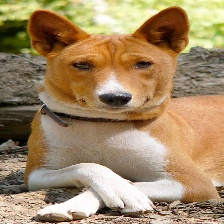

In [39]:
vImg = tf.keras.preprocessing.image.load_img("valid/Basenji/10.jpg")
vImg